In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt1
import seaborn as sns
import string
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC, NuSVC, LinearSVC
%matplotlib inline

In [2]:
df = pd.read_csv('P6_spam.csv',encoding = 'latin-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.info()
df = df.dropna(axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.shape

(5572, 2)

In [7]:
df.columns = ['label','message']
df = df[['message','label']]

In [8]:
df['length'] = df['message'].apply(len)
df.head()

,message,label,length
0,"Go until jurong point, crazy.. Available only ...",ham,111
1,Ok lar... Joking wif u oni...,ham,29
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam,155
3,U dun say so early hor... U c already then say...,ham,49
4,"Nah I don't think he goes to usf, he lives aro...",ham,61


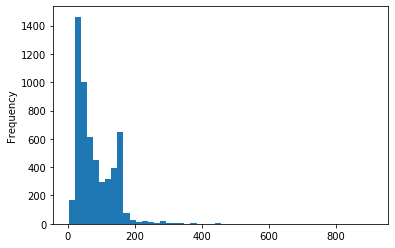

In [15]:
df['length'].plot(bins=50,kind='hist')

In [16]:
df.length.describe()

count    5572.000000
mean       80.118808
std        59.690841
min         2.000000
25%        36.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: length, dtype: float64

In [25]:
df[df['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [26]:
#To remove all the stop words in the messages.
def text_process(mess):
    nopunc =[char for char in mess if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [27]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/harithlk/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
#nltk.download('stopwords')
df['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [29]:
msg_train,msg_test,label_train,label_test = train_test_split(df['message'],df['label'],test_size=0.2)

#bow_transformer = CountVectorizer(analyzer=text_process).fit(df['message'])
bow_transformer = CountVectorizer(analyzer=text_process).fit(msg_train)
print(bow_transformer.vocabulary_)

{'want': 9518, 'sent': 8384, 'ltgt': 6866, 'mesages': 7047, 'today': 9148, 'Thats': 3396, 'Sorry': 3207, 'hurts': 6275, 'Ill': 2014, 'call': 4534, 'later': 6674, '1': 259, 'new': 7301, 'message': 7051, 'Please': 2784, '08715205273': 126, 'Sounds': 3212, 'great': 5997, 'home': 6190, 'Wen': 3684, 'u': 9302, 'miss': 7098, 'someone': 8601, 'boy': 4420, 'sweet': 8913, 'words': 9708, 'left': 6703, 'morning': 7157, 'sighs': 8483, 'goes': 5946, 'day': 5066, 'love': 6844, 'start': 8728, 'studying': 8814, 'Hmmmy': 1924, 'uncle': 9316, 'informed': 6360, 'hes': 6145, 'paying': 7615, 'school': 8312, 'directly': 5222, 'pls': 7730, 'buy': 4508, 'food': 5748, 'Youve': 3813, 'already': 3974, 'got': 5970, 'flaky': 5705, 'parent': 7574, 'Itsnot': 2047, 'supposed': 8890, 'childs': 4720, 'job': 6497, 'support': 8886, 'parentnot': 7575, 'theyre': 9065, 'Ride': 2939, 'age': 3923, 'anyway': 4046, 'Im': 2015, 'ive': 6454, 'hurt': 6273, 'unintentional': 9341, 'nonetheless': 7341, 'wonder': 9698, 'youll': 9858, 

In [41]:
print(len(bow_transformer.vocabulary_))

9947


In [35]:
#messages_bow = bow_transformer.transform(df['message'])
messages_bow = bow_transformer.transform(msg_train)

In [44]:
tfidf_transformer = TfidfTransformer(use_idf = False)
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(4457, 9947)


In [42]:
#spam_detect_model = MultinomialNB().fit(messages_tfidf,df['label'])
spam_detect_model = MultinomialNB().fit(messages_tfidf,label_train)

In [45]:
#bow_transformer1 = CountVectorizer(analyzer=text_process).fit(msg_test)
messages_bow1 = bow_transformer.transform(msg_test)
tfidf_transformer = TfidfTransformer(use_idf = False)
messages_tfidf1=tfidf_transformer.transform(messages_bow1)
all_predictions = spam_detect_model.predict(messages_tfidf1)
print(messages_tfidf1.shape)

print(all_predictions)
print(len(all_predictions))

(1115, 9947)
['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']
1115


In [47]:
print(classification_report(label_test,all_predictions))
print(confusion_matrix(label_test,all_predictions))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.98       968
        spam       1.00      0.68      0.81       147

    accuracy                           0.96      1115
   macro avg       0.98      0.84      0.89      1115
weighted avg       0.96      0.96      0.95      1115

[[968   0]
 [ 47 100]]


In [48]:
accuracy_score(label_test,all_predictions)

0.957847533632287